In [ ]:
!pip3 install langchain-huggingface
!pip3 install huggingface_hub
!pip3 install transfomers
!pip3 install accelerate
!pip3 install bitsandbytes
!pip3 install langchain

In [2]:
from PIL import Image

In [ ]:
from google.colab import userdata
sec_key=userdata.get('HUGGINGFACEHUB_API_TOKEN')
print(sec_key)

In [ ]:
import os
os.environ["HUGGIGNFACEHUB_API_TOKEN"]="ioaoaoppuqwiqiiqiqiq"
repo_id="mistralai/Mistral-7B-Instruct-v0.2"
llm=HuggingFaceEndpoint(repo_id=repo_id,temperature=0.2,token=sec_key)
llm.invoke("what is AI")


In [ ]:
## Trying with new model Mistral 7b

In [ ]:
repo_id_1="mistralai/Mistral-7B-Instruct-v0.3"
llm=HuggingFaceEndpoint(repo_id=repo_id_1,temperature=0.2,token=sec_key)
llm.invoke("what is AI")

In [ ]:
from langchain import  PromptTemplate,LLMChain,HuggingFaceHub
question="what is Pytorch"
template="""Question:{question}
Answer: Let's think step by step"""
prompt=PromptTemplate(template=template,input_variables=["question"])
print(prompt)
llm_chain=LLMChain(prompt=prompt,llm=llm)
print(llm_chain.run(question))

In [ ]:
## Hugginface endpoint

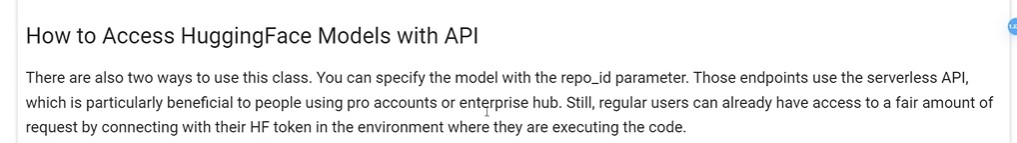

In [3]:
Image.open(r'/content/Huggingface_api.jpg')

In [ ]:
## Hugging facepipeline

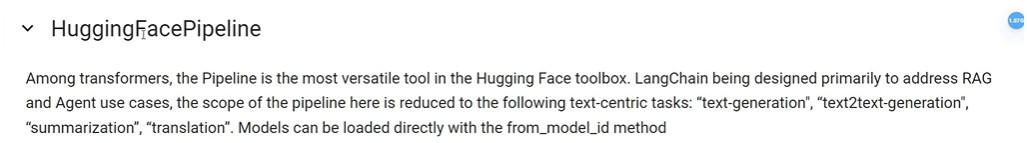

In [4]:
Image.open(r'/content/Hugging_face_pipeline.jpg')

In [ ]:
from langchain_huggingface import HuggingFacePipeline
from transformers import AutoModelForCausalLM,AutoTokenizer,pipeline
model_id="gpt2"
model=AutoModelForCausalLM.from_pretrained(model_id,trust_remote_code=True)
tokenizer=AutoTokenizer.from_pretrained(model_id)
pipe=pipeline("text-generation",model=model,tokenizer=tokenizer,max_new_tokens=5000)
hf=HuggingFacePipeline(pipeline=pipe)
hf.invoke(  "Pytorch is developed by Meta")

In [ ]:
hf.invoke(  "Tensorflow is developed by DeepMind")

In [ ]:
## there will be some memory complication with the  "mistralai/Mistral-7B-Instruct-v0.3" so we have to be cautious

In [ ]:
## Use Huggingface pipeline with GPU

In [ ]:
## device==0 then gpu when device=-1 then it uses cpu

In [ ]:
gpu_llm=HuggingFacePipeline.from_model_id(model_id="mistralai/Mistral-7B-Instruct-v0.3",task="text-generation",device=0,pipeline_kwargs={"max_new_tokens":100},)
gpu_llm.invoke("what is AI")

In [ ]:
from langchain_core.prompts import PromptTemplate
template="""Question:{question}
Answer: Let's think step by step"""
prompt=PromptTemplate(template=template,input_variables=["question"])
print(prompt)

In [ ]:
chain=prompt|gpu_llm


In [ ]:
chain.invoke({"question":"What is AI"})